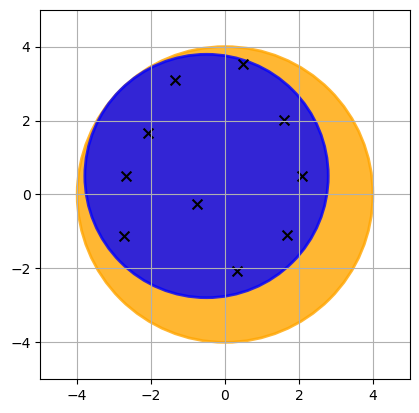

In [12]:
import matplotlib.pyplot as plt 
import math
import numpy as np 

# 圆的参数
r1 = 4
c1 = (0, 0) 
r2 = 4 - 0.5 * math.sqrt(2) 
c2 = (-0.5, 0.5)

# 创建图形和轴
fig, ax = plt.subplots()

# 绘制圆
circle_tt = plt.Circle(c1, r1, edgecolor='orange', facecolor='orange', linewidth=2, alpha=0.8) 
ax.add_patch(circle_tt) 
circle_ori = plt.Circle(c2, r2, edgecolor='blue', facecolor='blue', linewidth=2, alpha=0.8) 
ax.add_patch(circle_ori) 

# 在circle_ori范围内生成均匀分布的坐标
num_points = 10
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
radii = np.sqrt(np.random.uniform(0, r2**2, num_points))

x_positions = c2[0] + radii * np.cos(angles)
y_positions = c2[1] + radii * np.sin(angles)

# 绘制叉号
ax.scatter(x_positions, y_positions, marker='x', color='black', s=50)

# 设置轴的比例和范围
ax.set_aspect('equal', 'box')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

# 显示图形
plt.grid(True)
plt.show()


In [58]:
bias = 1

def ori_position(r_tt, c_tt, r_ori, c_ori, number): 
    x_positions = [] 
    y_positions = [] 
    while len(x_positions) < number: 
        x = np.random.uniform(-r_tt, r_tt) 
        y = np.random.uniform(-r_tt, r_tt) 
        if (c_ori[0] - x)**2 + (c_ori[1] - y)**2 < (r_ori**2 - bias):
            x_positions.append(x)
            y_positions.append(y) 

    return x_positions, y_positions 

def tt_position(r_tt, c_tt, r_ori, c_ori, number): 
    x_positions = [] 
    y_positions = [] 
    while len(x_positions) < number: 
        x = np.random.uniform(-r_tt, r_tt) 
        y = np.random.uniform(-r_tt, r_tt) 
        if (c_ori[0] - x)**2 + (c_ori[1] - y)**2 > (r_ori**2 + bias) and (c_tt[0] - x)**2 + (c_tt[1] - y)**2 < (r_tt**2 - bias):
            x_positions.append(x)
            y_positions.append(y) 

    return x_positions, y_positions 

def drawVenn(number_ori, number_tt, number_main): 
    r1 = 4
    c1 = (0, 0)
    r2 = 4 - 0.5 * math.sqrt(2)
    c2 = (-0.5, 0.5)

    # 创建图形和轴
    fig, ax = plt.subplots()
    plt.figure(figsize=(4, 4))

    # 绘制橙色圆
    circle_tt = plt.Circle(c1, r1, edgecolor='orange', facecolor='orange', linewidth=2, alpha=0.5)
    ax.add_patch(circle_tt)

    # 绘制蓝色圆
    circle_ori = plt.Circle(c2, r2, edgecolor='blue', facecolor='blue', linewidth=2, alpha=0.5)
    ax.add_patch(circle_ori)

    x_ori_position, y_ori_position = ori_position(r1, c1, r2, c2, number_ori) 
    x_tt_position, y_tt_position = tt_position(r1, c1, r2, c2, number_tt)

    ax.scatter(x_ori_position[:number_main], y_ori_position[:number_main], marker='x', color='black', linewidths=1.5, s=50)
    ax.scatter(x_ori_position[number_main:], y_ori_position[number_main:], marker='x', color='black', linewidths=0.5, s=50) 
    ax.scatter(x_tt_position, y_tt_position, marker='x', color='black', linewidths=0.5, s=50)

    # 设置轴的比例和范围
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.axis('off')
    # 显示图形
    # plt.grid(True)
    plt.show()


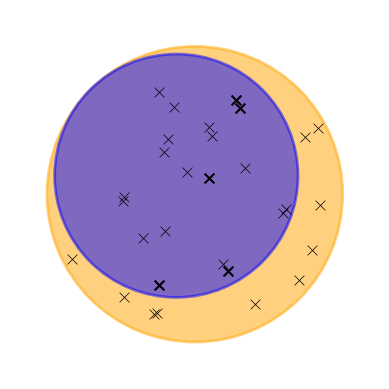

<Figure size 400x400 with 0 Axes>

In [59]:
drawVenn(20, 10, 5)

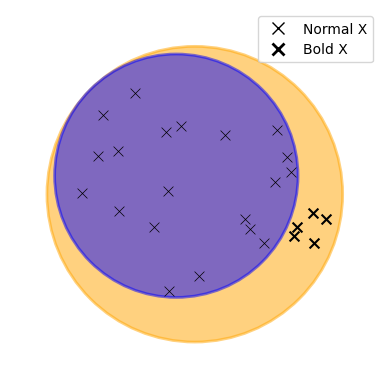

<Figure size 400x400 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import math 
from matplotlib.lines import Line2D

# 圆的参数
r1 = 4
c1 = (0, 0)
r2 = 4 - 0.5 * math.sqrt(2)
c2 = (-0.5, 0.5)

# 创建图形和轴
fig, ax = plt.subplots()
plt.figure(figsize=(4, 4))

# 绘制橙色圆
circle_tt = plt.Circle(c1, r1, edgecolor='orange', facecolor='orange', linewidth=2, alpha=0.5)
ax.add_patch(circle_tt)

# 绘制蓝色圆
circle_ori = plt.Circle(c2, r2, edgecolor='blue', facecolor='blue', linewidth=2, alpha=0.5)
ax.add_patch(circle_ori)

x_ori_position, y_ori_position = ori_position(r1, c1, r2, c2, 20) 
x_tt_position, y_tt_position = tt_position(r1, c1, r2, c2, 5)

ax.scatter(x_ori_position, y_ori_position, marker='x', color='black', linewidths=0.5, s=50) 
ax.scatter(x_tt_position, y_tt_position, marker='x', color='black', linewidths=1.5, s=50)

# # 在两个圆的交集区域生成均匀分布的坐标
# num_points = 50
# x_positions = []
# y_positions = []

# while len(x_positions) < num_points:
#     x = np.random.uniform(-4, 4)
#     y = np.random.uniform(-4, 4)
    
#     # 检查点是否在两个圆之间
#     if (c2[0] - x)**2 + (c2[1] - y)**2 >= r2**2 and (c1[0] - x)**2 + (c1[1] - y)**2 <= r1**2:
#         x_positions.append(x)
#         y_positions.append(y)

# # 绘制叉号
# ax.scatter(x_positions, y_positions, marker='x', color='red', s=100)

legend_elements = [
    Line2D([0], [0], marker='x', color='black', label='Streams', markerfacecolor='black', markersize=8, linestyle='None'),
    Line2D([0], [0], marker='x', color='black', label='Bold X', markerfacecolor='black', markersize=8, markeredgewidth=2, linestyle='None')
]
ax.legend(handles=legend_elements, loc='upper right')
# 设置轴的比例和范围
ax.set_aspect('equal', 'box')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')
# 显示图形
# plt.grid(True)
plt.show()
